In [68]:
#this imports all needed notebooks and utils for the below analysis 
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import sys
#sys.path.insert(0,r'c:\Users\Niell Lab\Documents\GitHub\freely-moving-saccades-dev')
import saccadeAnalysis as sacc

import fmEphys as fme

### Execute the below cell to create the dataset

In [69]:
recordings = fme.find('*fm1_ephys_props.h5', r'T:\Chris\CF_Rotation_analysis_data') #fill in file path to dataset folder between red ticks) if you want to compile a data set for doi experiments rerun this but find 'fm2_ephys_props.h5'
                    

rec_dict = {} #this chunk creates a dictionary of the compiled recordings through splitting and concatonating 
for r in recordings:
     r_name = os.path.split(r)[1].split('_fm1')[0] 
     all_rs = fme.find('{}*ephys_props.h5'.format(r_name), r'T:\Chris\CF_Rotation_analysis_data') #change file path to match above 
     rec_dict[r_name] = all_rs

data = sacc.stack_dataset(rec_dict) #this saves the stacked dataset set from compiled experiments 

data = fme.replace_xr_obj(data) 

_savefile = r'T:\Chris\CF_Rotation_analysis_data\fm1_baseline.h5' #must end in .h5 #put path to where you want the data saved 
fme.write_group_h5(data, _savefile) #this writes the data into the above save file 
#when you run this you should see a list of the experiments that it is combining 
data.columns.values

Stacking dataset.
Adding session 110723_J683LT_control_Rig2.


AttributeError: 'float' object has no attribute 'split'

### this next chunk of code sets up the data path and provides the pickle files for clustering 

In [66]:
data_path = r'T:\Chris\CF_Rotation_analysis_data\fm1_baseline.h5' #this needs to be changed if you change the savepath above
km_model = 'T:/freely_moving_ephys/SC_analysis/KMeans_PSTH_model_062022.pickle' #leave as is, based on V1 clusterin
pca_model = 'T:/freely_moving_ephys/SC_analysis/PCA_PSTH_model_062022.pickle' #leave as is, based on V1 clustering
savepath = r'T:\Chris\CF_Rotation_analysis_data\fm1_clustering' #change if desired, will save the clustering results of above lines

### The below code chunk will create a gui and ask for you to label the 4 clusters for SC those clusters are as follows: biphasic 1, late 2, early 3, negative 4, unresponsive 0

Reading HfFm dataset.


FileNotFoundError: [Errno 2] No such file or directory: 'T:\\Chris\\CF_Rotation_analysis_data_091223\\fm1_clustering\\KMEANS_RESULTS.png'

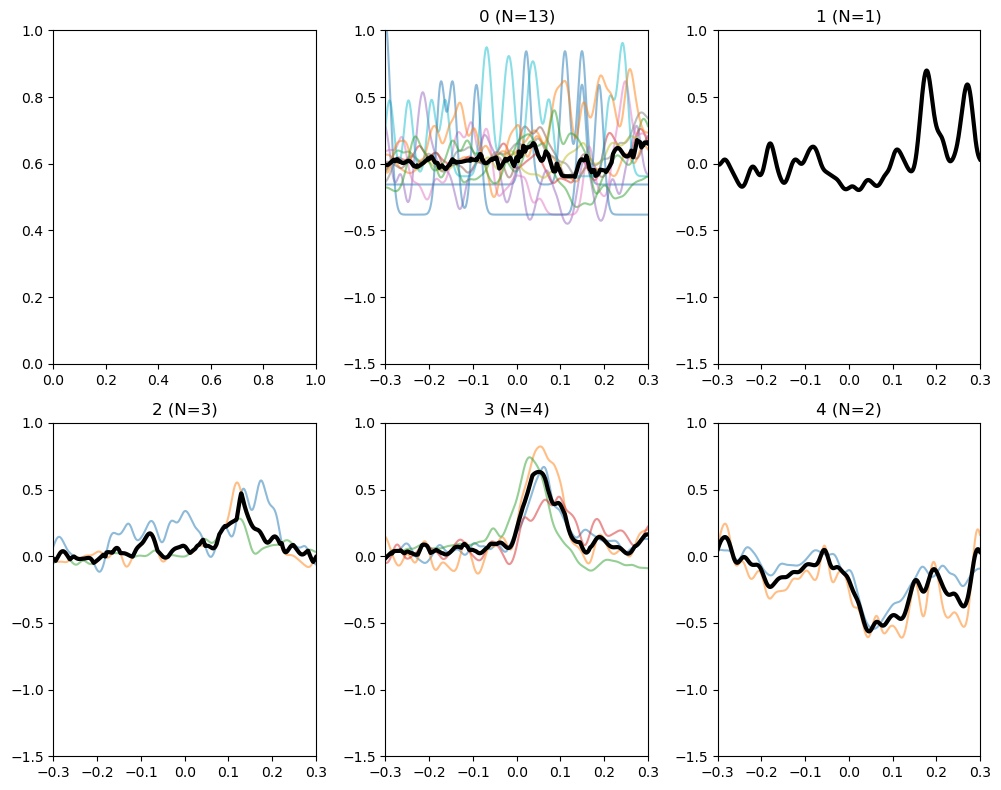

In [67]:
hffm, out ,= sacc.make_hffm_dataset( #this creates the dataset hffm which is where you will be able to access the data from these experiments
    savepath=savepath,
    session_dict=None,
    hffm_path=data_path,
    km_model=km_model,
    pca_model=pca_model
)

# when a python dialog box opens, open the file "KMEANS_RESULTS.png" written to the savepath,
# and enter the appropriate clustering labels according to that .png figure.
#if png is not produced as an additional window it can be found in the save path you provided above



In [42]:
data

,FmLt_Amplitude,FmLt_ContamPct,FmLt_KSLabel,FmLt_amp,FmLt_ch,FmLt_depth,FmLt_fr,FmLt_group,FmLt_n_spikes,FmLt_sh,...,Sn_stimT_all_shared,Sn_stimT_unit_offSub_allT,Sn_stimT_unit_offSub_darkT,Sn_stimT_unit_offSub_lightT,Sn_stimT_unit_offSub_bckgndT,Sn_stimT_unit_onSub_allT,Sn_stimT_unit_onSub_darkT,Sn_stimT_unit_onSub_lightT,Sn_stimT_unit_onSub_bckgndT,Sn_worldT
0,1342.5,0.6,good,133.039581,25.0,150.0,1.324364,good,10993.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1892.9,111.1,mua,160.527405,25.0,150.0,0.032528,good,270.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1654.7,0.9,good,176.489197,25.0,150.0,2.407541,good,19984.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1133.1,95.8,mua,78.575806,27.0,100.0,1.396287,good,11590.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2311.6,54.7,mua,109.374313,27.0,100.0,2.117200,good,17574.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[-0.6547956666635097, -0.5906296666633959, -0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.3345803333342095, 0.41...","[-0.2803061666653472, -0.14942616666473138, 0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.3345803333342095, 0.41...","[-0.2803061666653472, -0.14942616666473138, 0....","[-0.8142204999967362, -0.798399999999674, -0.7..."
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[-0.6547956666635097, -0.5906296666633959, -0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.3345803333342095, 0.41...","[-0.2803061666653472, -0.14942616666473138, 0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[0.3345803333342095, 0.4190408333325953, 0.452...","[-0.4083766666643593, -0.2803061666653472, -0....","[-0.8142204999967362, -0.798399999999674, -0.7..."
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[-0.6547956666635097, -0.5906296666633959, -0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.10259333333500156, 0.3...","[-0.2803061666653472, -0.14942616666473138, 1....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, -0.2803061666653472, 0.3...","[-0.14942616666473138, 0.10259333333500156, 1....","[-0.8142204999967362, -0.798399999999674, -0.7..."
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[-0.6547956666635097, -0.5906296666633959, -0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.3345803333342095, 0.41...","[-0.2803061666653472, -0.14942616666473138, 0....","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.649228166663185, -0.5974776666642962, -0.5...","[-0.4083766666643593, 0.3345803333342095, 0.41...","[-0.2803061666653472, 0.10259333333500156, 1.0...","[-0.8142204999967362, -0.798399999999674, -0.7..."


### now that the clusters are created you can play with the data 

In [ ]:
#run this line to see the dataframe as a whole 
hffm

In [1]:
#most of the data you will be using is actually accessible through clustering portion of hffm dataset which is "out"

out

NameError: name 'out' is not defined

In [ ]:
#here we create a series of variables that make it a bit easier for plotting temp sequences
temporal_sequence = out['Fm_pref_temseq'] #variable for preferred temp sequence of gaze shift responsive cells in dataset achieved by indexing into out 

temporal_sequence_nonpref = out['Fm_nonpref_temseq'] #non preferred temp sequences of gaze shift responsive cells

latency_resp = out['Fm_latency_unsort'][resp] #this creates a variable of responsive cells that are sorted by their latency to a gaze shift

temp_seq_nonpref_unsort = out['Fm_nonpref_temseq_unsort'] #non preferred temp sequences of all cells

sorted_resp = resp[np.argsort(latency_resp)] #this variable provides the indices of responsive cells sorted by ascending latency 

#let me know if you want to look at any of the unresponsive cell activity I can add in the code for that 
#this same basis can be used for doi responses too by looking for the same info but naming differently ie. temporal_sequence_doi 

### Now we can start plotting the data 

In [ ]:
#preferred temp sequence response of cells responsive to gazeshifts pre doi
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
_im = sacc.plot_PSTH_heatmap(ax, temporal_sequence, cscale=1)
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Preferred temporal sequence pre doi")
ax.xaxis.set_label_position("top")

In [ ]:
#nonpreferred temp sequence response of cells responsive to gazeshifts pre doi 
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300) 
_im = sacc.plot_PSTH_heatmap(ax, temp_seq_nonpref_unsort[sorted_resp,:], cscale=1) #makes psth heatmap of temp seq of nonpreferred responses organized by ascending latency as established by sorted_resp
ax.set_aspect(4.)
plt.colorbar(ax=ax, mappable=_im)
plt.xlabel("Non preferred temporal sequence pre doi")

ax.xaxis.set_label_position("top")

### These plots create the mean cluster responses 

In [ ]:
#cluster mean plot of preferred gaze shifts
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late', 'biphasic','negative'] #names for clusters
for count, name in enumerate(names):  #for loop to iterate through calculating each mean/std for each cluster and plot on top of each other
    cluster_psths = fme.flatten_series(hffm['pref_gazeshift_psth'][hffm['gazecluster']==name])
    clustmean = np.nanmean(cluster_psths,0)
    clusterr = np.std(cluster_psths,0)/ np.sqrt(np.size(cluster_psths,0)) #std error for cluster psths 
    plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
    plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr,color=colors[name],alpha=0.3)
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("gaze shift")

ax.xaxis.set_label_position("top")

In [ ]:
#cluster mean plots for nonpreffered gaze shift responses pre doi 
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=300)
names = ['early','late', 'biphasic','negative']
for count, name in enumerate(names):
    cluster_psths = fme.flatten_series(hffm['nonpref_gazeshift_psth'][hffm['gazecluster']==name])
    clustmean = np.nanmean(cluster_psths,0)
    clusterr = np.std(cluster_psths,0)/ np.sqrt(np.size(cluster_psths,0))
    plt.plot(psth_bins, clustmean, '-', linewidth=2, color=colors[name])
    plt.fill_between(psth_bins, clustmean-clusterr, clustmean+clusterr,color=colors[name],alpha=0.3)
plt.xlim([-0.2,0.4]); plt.ylim([-.6,.6])
plt.ylabel('norm. spike rate'); plt.xlabel('time (msec)')
ax.vlines(0,-1,1,color='k',linestyle='dashed',linewidth=1)
#ax_clusters.set_xticks(np.linspace(-0.2,0.4,4), labels=np.linspace(-200,400,4).astype(int))
#ax_clusters.set_yticks(np.linspace(-0.5,0.5,3))
plt.xlabel("nonpreffered gaze shift")

ax.xaxis.set_label_position("top")